In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the caret_analyze package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys
from pathlib import Path

sys.path.append(os.path.join(os.path.dirname(Path().resolve()), '..'))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# build and source caret_analyze package
from caret_analyze import Architecture, Application, Lttng

Failed to find record_cpp_impl. the Python version will be used.


In [5]:
trace_dir_path = './cyclic_pipeline_intra_process/'
lttng = Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./cyclic_pipeline_intra_process/converted
converting trace directory: ./cyclic_pipeline_intra_process
converted 328 events in 410 ms
output written to: ./cyclic_pipeline_intra_process/converted
 [100%] [Ros2Handler]


In [6]:
arch = Architecture()
architecture_path = './cyclic_pipeline_intra_process/architecture.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [7]:
app = Application(arch)

In [8]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /pipe1
callback_type: subscription_callback
subscription topic name :/topic1
callback_name: subscription_callback_0
callback symbol: IncrementerPipe::IncrementerPipe(std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&)::{lambda(std::unique_ptr<std_msgs::msg::Int32>)#1}
callback unique name: /pipe1/subscription_callback_0


In [9]:
start_callback_unique_name = app.callbacks[0].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /pipe1/subscription_callback_0
end_callback: /pipe1/subscription_callback_0


In [10]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [11]:
path = paths[0]

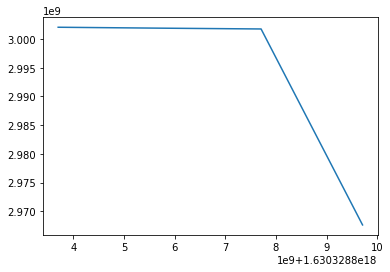

In [12]:
t, latency = path.to_timeseries()
plt.plot(t, latency)

In [13]:
path.to_timeseries()[1]

array([3.00205824e+09, 3.00189952e+09, 3.00175770e+09, 2.96761933e+09,
                  nan])

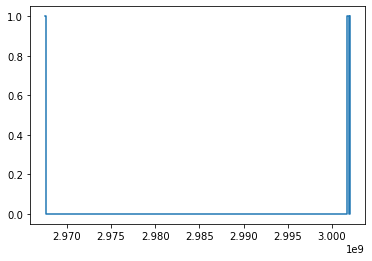

In [14]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [15]:
df = path.to_dataframe(remove_dropped=True)
df

,/pipe1/subscription_callback_0/callback_start_timestamp/0,/pipe1/subscription_callback_0/callback_end_timestamp/0,/pipe1/subscription_callback_0/rclcpp_intra_publish_timestamp/0,/pipe2/subscription_callback_0/callback_start_timestamp/0,/pipe2/subscription_callback_0/callback_end_timestamp/0,/pipe2/subscription_callback_0/rclcpp_intra_publish_timestamp/0,/pipe1/subscription_callback_0/callback_start_timestamp/1,/pipe1/subscription_callback_0/callback_end_timestamp/1
0,1630328803702312834,1630328804702601309,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18
1,1630328805704086203,1630328806704371183,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18
2,1630328807705701239,1630328808705985866,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18
3,1630328809707165545,1630328810707458726,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18,1.630329e+18


([<matplotlib.axis.YTick at 0x7f6cf1765610>,
 <a list of 8 Text yticklabel objects>)

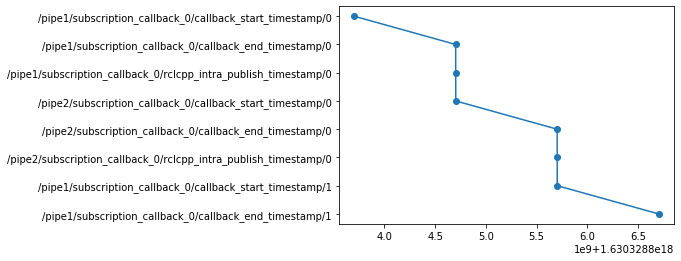

In [16]:
for i, row in df.iterrows():
    x = row.values
    y = np.array(range(len(x))) * -1
    plt.plot(x, y, marker='o')
    break

plt.yticks(y, df.columns)